In [23]:
import pandas as pd

from services.data_provider import DataLoader, feature_columns
from services.odds import get_implied_probabilities
from models import outcome_model
from db.interface import open_connection, close_connection
from simulation.predictor import OutcomePredictor
from simulation.season_simulator import SeasonSimulator
from simulation.utils import plot_simulation, plot_probabilities_against_market

In [2]:
conn = open_connection()

### Optimize hyperparameters

In [3]:
param_grid = {
    'max_depth': [3, 5, 8, 12, None],
    'min_samples_leaf': [10, 15, 20, 25, 30, 40, 50],
    'max_features': ["sqrt", "log2"],
    'n_estimators': [2000]
}

hyperparam_optimization_dl = DataLoader(feature_columns, "outcome")
best_params, score = outcome_model.run_grid_search(param_grid, hyperparam_optimization_dl)
best_params

Grid scores on development set:

-0.998 (+/-0.034) for {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 2000}
-0.998 (+/-0.034) for {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'n_estimators': 2000}
-0.998 (+/-0.033) for {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 2000}
-0.998 (+/-0.033) for {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 25, 'n_estimators': 2000}
-0.998 (+/-0.033) for {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'n_estimators': 2000}
-0.998 (+/-0.034) for {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 40, 'n_estimators': 2000}
-0.998 (+/-0.034) for {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 2000}
-0.999 (+/-0.033) for {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 2000}
-0.998 (+/-0.034) for {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 15, 'n_estim

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'n_estimators': 2000}

### Select a season to simulate

In [5]:
season_id = 53
data_loader = DataLoader(feature_columns, "outcome", filter_season=[season_id])
X, y = data_loader.get_dataset()

### Train the model

In [7]:
model = outcome_model.get_model(best_params, X, y)

### Simulate the season

In [12]:
predictor = OutcomePredictor(model)
simulator = SeasonSimulator(season_id, data_loader, predictor, conn)
simulator.run()

2018-11-05 10:22:20,597 [MainThread  ] [INFO ]  Simulating match Arsenal - Aston Villa with id 26469. Outcome 1 [0.68541747 0.17766507 0.13691746]
2018-11-05 10:22:21,023 [MainThread  ] [INFO ]  Simulating match Liverpool - Stoke City with id 26470. Outcome 1 [0.65515697 0.2104099  0.13443313]
2018-11-05 10:22:21,442 [MainThread  ] [INFO ]  Simulating match Norwich City - Everton with id 26471. Outcome 1 [0.35733456 0.3040275  0.33863794]
2018-11-05 10:22:21,860 [MainThread  ] [INFO ]  Simulating match Sunderland - Fulham with id 26472. Outcome 1 [0.41169901 0.3092022  0.27909879]
2018-11-05 10:22:22,288 [MainThread  ] [INFO ]  Simulating match Swansea City - Manchester United with id 26473. Outcome -1 [0.19167535 0.28454152 0.52378313]
2018-11-05 10:22:22,703 [MainThread  ] [INFO ]  Simulating match West Bromwich Albion - Southampton with id 26474. Outcome 1 [0.42649562 0.3003337  0.27317068]
2018-11-05 10:22:23,131 [MainThread  ] [INFO ]  Simulating match West Ham United - Cardiff Ci

2018-11-05 10:22:41,290 [MainThread  ] [INFO ]  Simulating match Southampton - Crystal Palace with id 26523. Outcome 1 [0.49009657 0.28247712 0.22742631]
2018-11-05 10:22:41,674 [MainThread  ] [INFO ]  Simulating match Swansea City - Arsenal with id 26524. Outcome -1 [0.26844457 0.27951257 0.45204286]
2018-11-05 10:22:42,065 [MainThread  ] [INFO ]  Simulating match Tottenham Hotspur - Chelsea with id 26525. Outcome 1 [0.39975587 0.30813808 0.29210605]
2018-11-05 10:22:42,416 [MainThread  ] [INFO ]  Simulating match Stoke City - Norwich City with id 26526. Outcome 1 [0.45140039 0.30527181 0.2433278 ]
2018-11-05 10:22:42,762 [MainThread  ] [INFO ]  Simulating match Sunderland - Liverpool with id 26527. Outcome -1 [0.30743746 0.26255754 0.43000499]
2018-11-05 10:22:43,107 [MainThread  ] [INFO ]  Simulating match Everton - Newcastle United with id 26528. Outcome 1 [0.50852981 0.27928248 0.21218771]
2018-11-05 10:22:43,553 [MainThread  ] [INFO ]  Simulating match Cardiff City - Newcastle Un

2018-11-05 10:23:01,729 [MainThread  ] [INFO ]  Simulating match Swansea City - Stoke City with id 26577. Outcome 1 [0.43100595 0.3206742  0.24831986]
2018-11-05 10:23:02,085 [MainThread  ] [INFO ]  Simulating match Tottenham Hotspur - Newcastle United with id 26578. Outcome 1 [0.57586866 0.24255545 0.1815759 ]
2018-11-05 10:23:02,569 [MainThread  ] [INFO ]  Simulating match Arsenal - Southampton with id 26579. Outcome 1 [0.74927246 0.15740228 0.09332526]
2018-11-05 10:23:02,951 [MainThread  ] [INFO ]  Simulating match Everton - Liverpool with id 26580. Outcome 1 [0.37957949 0.31028692 0.31013359]
2018-11-05 10:23:03,333 [MainThread  ] [INFO ]  Simulating match Fulham - Swansea City with id 26581. Outcome 1 [0.42697362 0.29440903 0.27861735]
2018-11-05 10:23:03,835 [MainThread  ] [INFO ]  Simulating match Hull City - Crystal Palace with id 26582. Outcome 1 [0.42969594 0.30552751 0.26477655]
2018-11-05 10:23:04,244 [MainThread  ] [INFO ]  Simulating match Newcastle United - Norwich City

2018-11-05 10:23:21,664 [MainThread  ] [INFO ]  Simulating match Liverpool - Cardiff City with id 26631. Outcome 1 [0.74685904 0.15088832 0.10225264]
2018-11-05 10:23:22,009 [MainThread  ] [INFO ]  Simulating match Manchester United - West Ham United with id 26632. Outcome 1 [0.74637107 0.15846775 0.09516118]
2018-11-05 10:23:22,349 [MainThread  ] [INFO ]  Simulating match Stoke City - Aston Villa with id 26633. Outcome 1 [0.41615806 0.31063428 0.27320766]
2018-11-05 10:23:22,688 [MainThread  ] [INFO ]  Simulating match Sunderland - Norwich City with id 26634. Outcome 1 [0.40199499 0.31834048 0.27966454]
2018-11-05 10:23:23,026 [MainThread  ] [INFO ]  Simulating match West Bromwich Albion - Hull City with id 26635. Outcome 1 [0.55001549 0.24390729 0.20607723]
2018-11-05 10:23:23,372 [MainThread  ] [INFO ]  Simulating match Southampton - Tottenham Hotspur with id 26636. Outcome -1 [0.29381055 0.29675802 0.40943144]
2018-11-05 10:23:23,717 [MainThread  ] [INFO ]  Simulating match Swansea

2018-11-05 10:23:40,668 [MainThread  ] [INFO ]  Simulating match West Ham United - Newcastle United with id 26685. Outcome 1 [0.34254588 0.32341165 0.33404248]
2018-11-05 10:23:41,013 [MainThread  ] [INFO ]  Simulating match Chelsea - Manchester United with id 26686. Outcome 1 [0.43411403 0.31864849 0.24723747]
2018-11-05 10:23:41,361 [MainThread  ] [INFO ]  Simulating match Swansea City - Tottenham Hotspur with id 26687. Outcome 1 [0.35537695 0.2980953  0.34652775]
2018-11-05 10:23:41,700 [MainThread  ] [INFO ]  Simulating match West Bromwich Albion - Everton with id 26688. Outcome -1 [0.33717491 0.30206001 0.36076508]
2018-11-05 10:23:42,174 [MainThread  ] [INFO ]  Simulating match Crystal Palace - Hull City with id 26689. Outcome 1 [0.4094464  0.31533564 0.27521796]
2018-11-05 10:23:42,554 [MainThread  ] [INFO ]  Simulating match Liverpool - Everton with id 26690. Outcome 1 [0.44751516 0.312587   0.23989784]
2018-11-05 10:23:42,941 [MainThread  ] [INFO ]  Simulating match Manchester

2018-11-05 10:24:00,156 [MainThread  ] [INFO ]  Simulating match Hull City - Newcastle United with id 26739. Outcome 1 [0.35988711 0.31368324 0.32642965]
2018-11-05 10:24:00,493 [MainThread  ] [INFO ]  Simulating match Southampton - Liverpool with id 26740. Outcome -1 [0.28428978 0.26803049 0.44767973]
2018-11-05 10:24:00,852 [MainThread  ] [INFO ]  Simulating match Stoke City - Arsenal with id 26741. Outcome -1 [0.19823634 0.25134521 0.55041845]
2018-11-05 10:24:01,194 [MainThread  ] [INFO ]  Simulating match Aston Villa - Norwich City with id 26742. Outcome 1 [0.40181178 0.33348683 0.26470138]
2018-11-05 10:24:01,531 [MainThread  ] [INFO ]  Simulating match Swansea City - Crystal Palace with id 26743. Outcome 1 [0.54020598 0.27319417 0.18659985]
2018-11-05 10:24:01,900 [MainThread  ] [INFO ]  Simulating match Tottenham Hotspur - Cardiff City with id 26744. Outcome 1 [0.71718005 0.1632471  0.11957285]
2018-11-05 10:24:02,378 [MainThread  ] [INFO ]  Simulating match Cardiff City - Fulh

2018-11-05 10:24:21,099 [MainThread  ] [INFO ]  Simulating match West Ham United - Liverpool with id 26793. Outcome -1 [0.2810364  0.25489586 0.46406774]
2018-11-05 10:24:21,455 [MainThread  ] [INFO ]  Simulating match Tottenham Hotspur - Sunderland with id 26794. Outcome 1 [0.58447235 0.24113182 0.17439583]
2018-11-05 10:24:21,907 [MainThread  ] [INFO ]  Simulating match Crystal Palace - Aston Villa with id 26795. Outcome 1 [0.35473225 0.30540469 0.33986306]
2018-11-05 10:24:22,267 [MainThread  ] [INFO ]  Simulating match Fulham - Norwich City with id 26796. Outcome 1 [0.45556243 0.30702723 0.23741034]
2018-11-05 10:24:22,626 [MainThread  ] [INFO ]  Simulating match Southampton - Cardiff City with id 26797. Outcome 1 [0.52806579 0.26183172 0.2101025 ]
2018-11-05 10:24:22,980 [MainThread  ] [INFO ]  Simulating match Stoke City - Newcastle United with id 26798. Outcome 1 [0.40561194 0.32838283 0.26600523]
2018-11-05 10:24:23,503 [MainThread  ] [INFO ]  Simulating match Sunderland - Ever

2018-11-05 10:24:43,312 [MainThread  ] [INFO ]  Simulating match Tottenham Hotspur - Aston Villa with id 26847. Outcome 1 [0.64536837 0.1963688  0.15826283]
2018-11-05 10:24:43,672 [MainThread  ] [INFO ]  Simulating match West Bromwich Albion - Stoke City with id 26848. Outcome 1 [0.39932159 0.33406962 0.26660879]
2018-11-05 10:24:43,679 [MainThread  ] [INFO ]  Model's accuracy for season 53: 0.5736842105263158
2018-11-05 10:24:53,266 [MainThread  ] [INFO ]  Average overroundness of the odds: 0.02015769271007621
2018-11-05 10:24:53,270 [MainThread  ] [INFO ]  Betting market accuracy for season 53: 0.6
2018-11-05 10:24:53,272 [MainThread  ] [INFO ]  Unit strategy profitability for season 53: 1.2331249999999991
/m/home/home1/13/toiviav1/unix/dev/golden_goal/bet/kelly_strategy.py:10: RuntimeWarning: invalid value encountered in log
  return -(p1 * np.log(1 + o1*a - b - c) + p2 * np.log(1 + o2*b - a - c) + p3*np.log(1 + o3*c - a - b))
2018-11-05 10:24:53,628 [MainThread  ] [INFO ]  Kelly s

### Plot the results

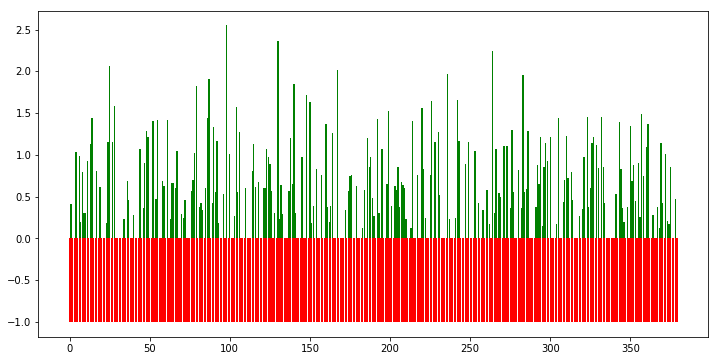

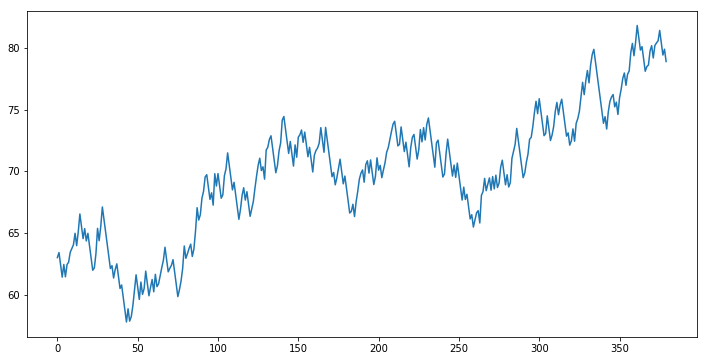

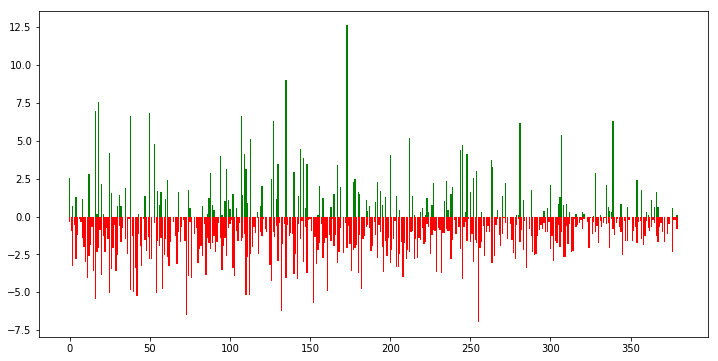

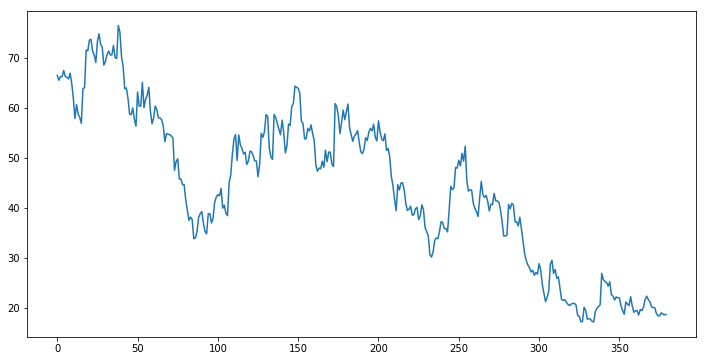

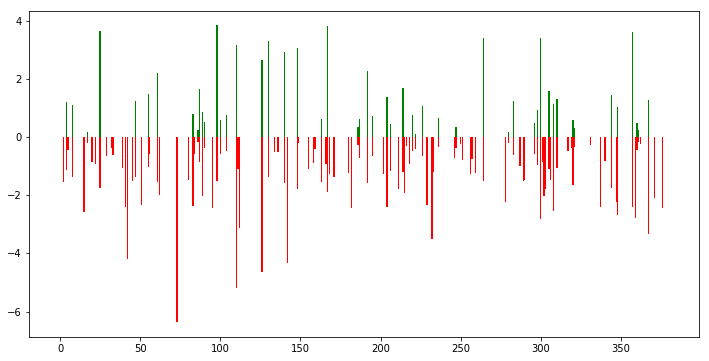

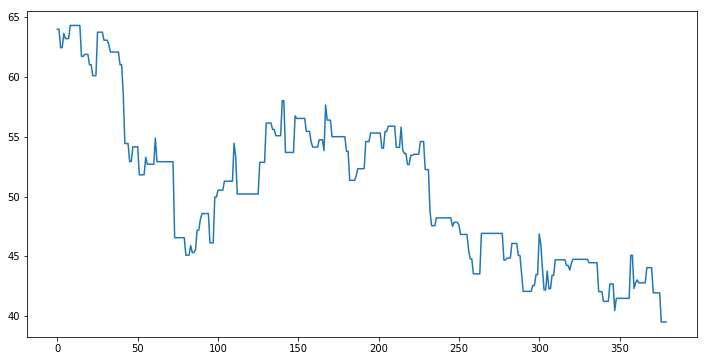

In [19]:
plot_simulation(simulator)

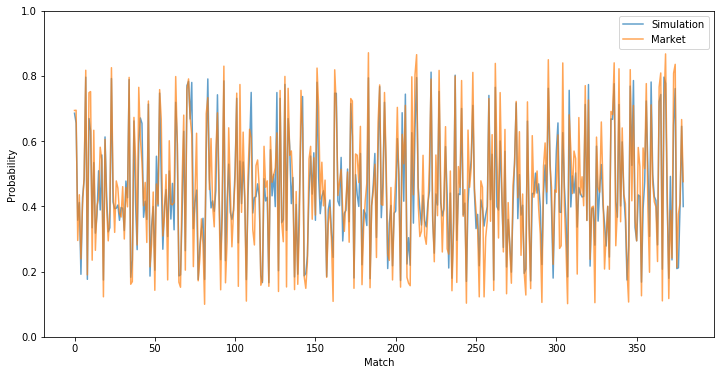

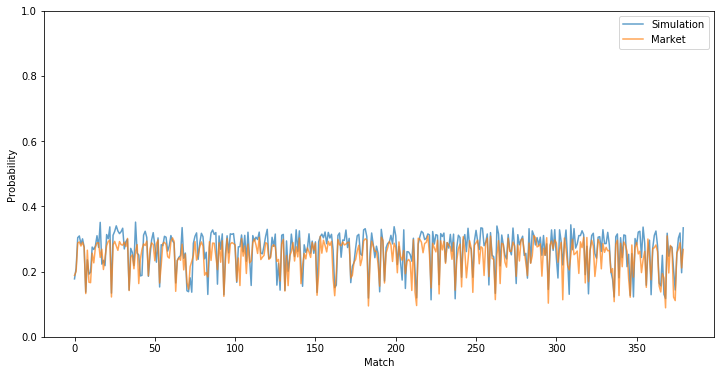

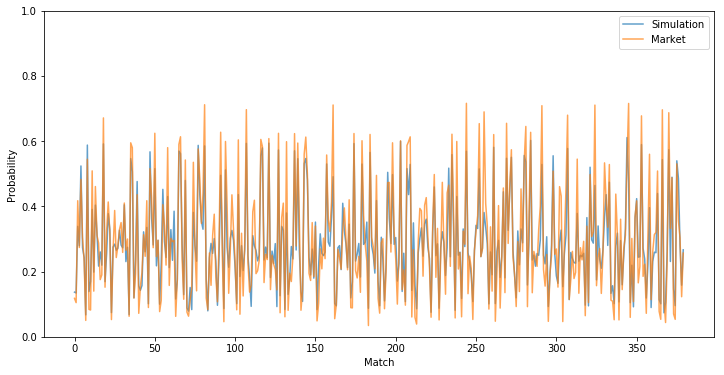

In [25]:
df = pd.DataFrame(simulator.matches)
plot_probabilities_against_market(
    simulator.probabilities, 
    get_implied_probabilities(simulator.odds), 
    "outcome_model")

### Close db connection

In [ ]:
close_connection(conn)